## Preprocessed DATA

In [1]:
import pandas as pd

file_path = "dataset.xlsx"

ib_data = pd.read_excel(file_path, sheet_name="DATA IB")
ik_data = pd.read_excel(file_path, sheet_name="DATA IK")

# kolom yang relevan --> 'keperluan'
ib_data = ib_data[["desc"]].rename(columns={"desc": "keperluan"})
ik_data = ik_data[["tujuan"]].rename(columns={"tujuan": "keperluan"})

# add kolom penanda 'izin'
ib_data["izin"] = "IB"
ik_data["izin"] = "IK"

combined_data = pd.concat([ib_data, ik_data], ignore_index=True)

# Bersihkan teks pada kolom 'keperluan'
combined_data["keperluan"] = combined_data["keperluan"].str.strip().str.lower()

combined_data.to_csv("combined_ib_ik_keperluan.csv", index=False)

print(combined_data.head())


                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


In [6]:
import pandas as pd

# Muat data
file_path = "combined_ib_ik_keperluan.csv"
data = pd.read_csv(file_path)

# Tampilkan informasi data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80366 entries, 0 to 80365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keperluan  80366 non-null  object
 1   izin       80366 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


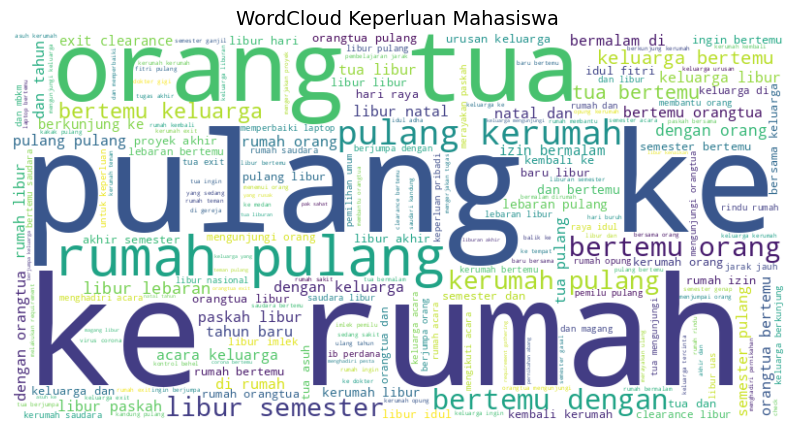

10 Kata Paling Umum dalam Keperluan:
pulang: 25158
rumah: 19215
ke: 18475
bertemu: 15071
libur: 14886
orang: 10994
tua: 10598
keluarga: 10439
kerumah: 9241
dan: 7372
dengan: 5415
semester: 4958
orangtua: 4349
di: 3142
lebaran: 2484
paskah: 2433
acara: 2111
tahun: 1919
bermalam: 1719
natal: 1713


In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Hitung distribusi kata
all_keperluan = " ".join(data["keperluan"])
word_counts = Counter(all_keperluan.split())

# Tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keperluan)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Keperluan Mahasiswa", fontsize=14)
plt.show()

# Tampilkan kata paling umum
common_words = word_counts.most_common(20)
print("10 Kata Paling Umum dalam Keperluan:")
for word, count in common_words:
    print(f"{word}: {count}")


In [14]:
import re

# Klasifikasi keperluan
def classify_keperluan(text):
    if re.search(r"(laptop|printer|buku|barang)", text):
        return "Membeli Barang"
    elif re.search(r"(orangtua|orang tua|keluarga|saudara|pulang|rumah|bertemu|libur|pemilu|ib|pesta|pernikahan|natal|lebaran|paskah|acara)", text):
        return "Bertemu Keluarga"
    elif re.search(r"(proyek|PKM|tugas|makalah|requirement|observasi|pa 1|pa 2| pa 3|tugas akhir|akhir)", text):
        return "Tugas Kuliah"
    elif re.search(r"(kontrol|gigi|behel|cabut|sakit)", text):
        return "Pergi ke Klinik"
    elif re.search(r"(atm|rekening|tabungan|kartu)", text):
        return "Mengurus Kartu Bank"
    elif re.search(r"(exit|clearance|wisuda)", text):
        return "Tamat Kuliah"
    else:
        return "Lainnya"

data["kategori"] = data["keperluan"].apply(classify_keperluan)

# Tampilkan hasil klasifikasi
print(data["kategori"].value_counts())

# Simpan hasil klasifikasi
data.to_csv("categorized_keperluan.csv", index=False)


kategori
Bertemu Keluarga       70516
Lainnya                 5931
Tamat Kuliah            1226
Membeli Barang           936
Tugas Kuliah             930
Pergi ke Klinik          670
Mengurus Kartu Bank      157
Name: count, dtype: int64


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv("categorized_keperluan.csv")

# Pastikan kolom 'keperluan' ada dalam dataset
print(data.columns)

# Vektor TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Batas maksimal fitur untuk efisiensi
tfidf_matrix = vectorizer.fit_transform(data['keperluan'])

# Konversi TF-IDF ke DataFrame
tfidf_data = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Simpan untuk referensi
tfidf_data.to_csv("tfidf_data.csv", index=False)


Index(['keperluan', 'izin', 'kategori'], dtype='object')


In [26]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_data)

# Simpan hasil PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['kategori'] = data['kategori']  # Tambahkan kategori untuk keperluan analisis
pca_df.to_csv("tfidf_pca.csv", index=False)

# Print hasil PCA untuk visualisasi
print(pca_df.head())

        PC1       PC2          kategori
0 -0.334774  0.427503  Bertemu Keluarga
1 -0.334774  0.427503  Bertemu Keluarga
2 -0.234740 -0.241122  Bertemu Keluarga
3 -0.318119 -0.464424  Bertemu Keluarga
4 -0.398695  0.618300  Bertemu Keluarga


/tmp/ipykernel_565/1840698245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="kategori", palette="viridis")


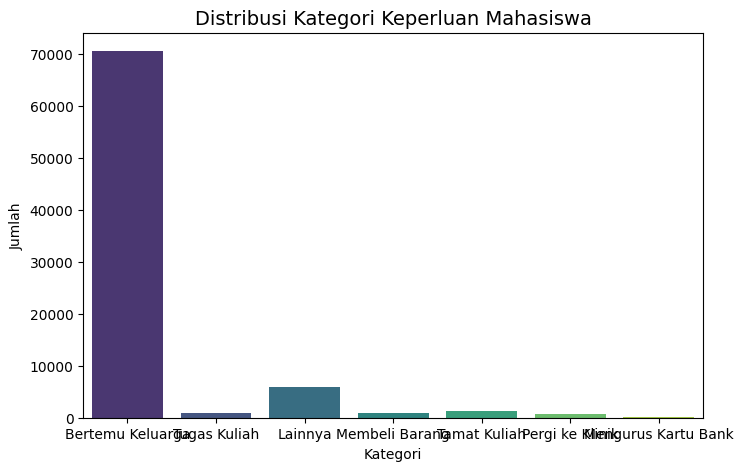

In [17]:
import seaborn as sns

# Plot distribusi kategori
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="kategori", palette="viridis")
plt.title("Distribusi Kategori Keperluan Mahasiswa", fontsize=14)
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "categorized_keperluan.csv"
data = pd.read_csv(file_path)

encoder = LabelEncoder()
data["kategori_encoded"] = encoder.fit_transform(data["kategori"])

print("Kategori Encoding:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Kategori Encoding:
{'Bertemu Keluarga': 0, 'Lainnya': 1, 'Membeli Barang': 2, 'Mengurus Kartu Bank': 3, 'Pergi ke Klinik': 4, 'Tamat Kuliah': 5, 'Tugas Kuliah': 6}


In [20]:
from sklearn.cluster import KMeans
import numpy as np

# Tentukan fitur untuk clustering
X = data[["kategori_encoded"]].values

# Inisialisasi dan jalankan K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
data["cluster"] = kmeans.fit_predict(X)

# Tampilkan jumlah data per cluster
print("Distribusi Data per Cluster:")
print(data["cluster"].value_counts())


Distribusi Data per Cluster:
cluster
0    70516
3     5931
4     1226
5      936
1      930
6      670
2      157
Name: count, dtype: int64


/tmp/ipykernel_565/304897679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="cluster", palette="Set2")


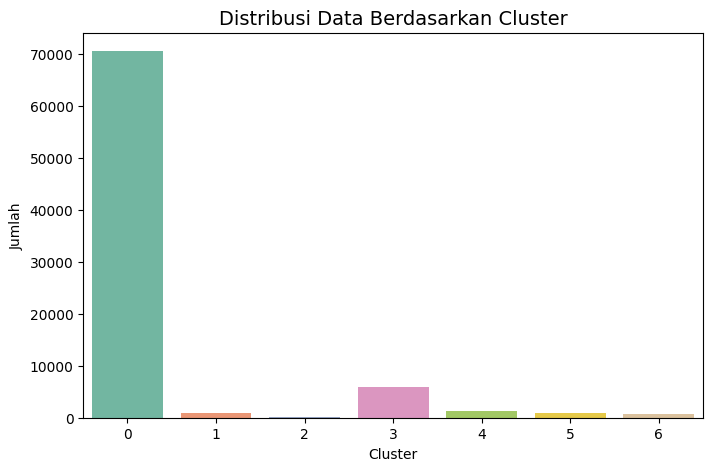

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="cluster", palette="Set2")
plt.title("Distribusi Data Berdasarkan Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Jumlah")
plt.show()


In [22]:
# Analisis kategori dalam setiap cluster
for cluster_id in data["cluster"].unique():
    print(f"Cluster {cluster_id}:")
    print(data[data["cluster"] == cluster_id]["kategori"].value_counts())
    print("\n")


Cluster 0:
kategori
Bertemu Keluarga    70516
Name: count, dtype: int64


Cluster 1:
kategori
Tugas Kuliah    930
Name: count, dtype: int64


Cluster 3:
kategori
Lainnya    5931
Name: count, dtype: int64


Cluster 5:
kategori
Membeli Barang    936
Name: count, dtype: int64


Cluster 4:
kategori
Tamat Kuliah    1226
Name: count, dtype: int64


Cluster 6:
kategori
Pergi ke Klinik    670
Name: count, dtype: int64


Cluster 2:
kategori
Mengurus Kartu Bank    157
Name: count, dtype: int64




/tmp/ipykernel_565/3296925368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="cluster", palette="Set3")


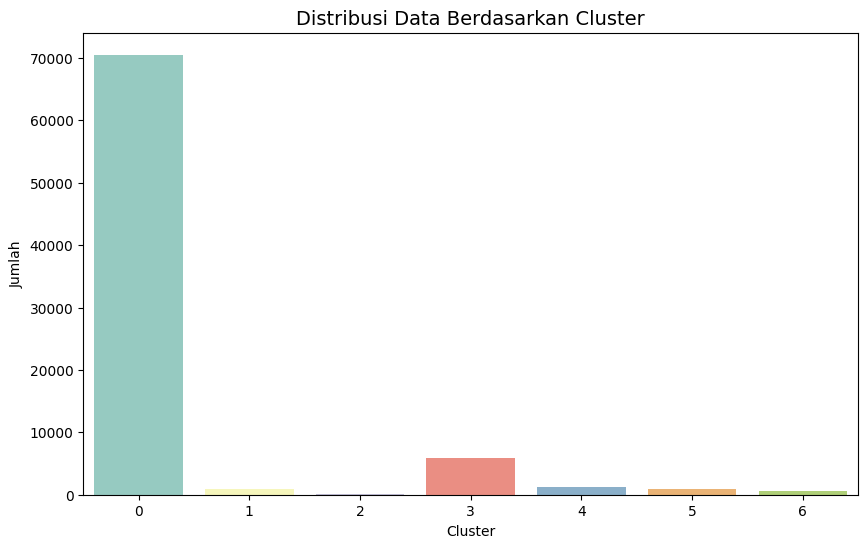

In [23]:
# Plot jumlah data di setiap cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="cluster", palette="Set3")
plt.title("Distribusi Data Berdasarkan Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Jumlah")
plt.show()


In [24]:
import pandas as pd

# Peluang bisnis untuk setiap cluster
opportunities = {
    "Cluster": [0, 1, 2, 3, 4, 5, 6],
    "Kategori Dominan": [
        "Bertemu Keluarga",
        "Tugas Kuliah",
        "Mengurus Kartu Bank",
        "Lainnya",
        "Tamat Kuliah",
        "Membeli Barang",
        "Pergi ke Klinik"
    ],
    "Peluang Bisnis": [
        "Transportasi, Penginapan, Oleh-oleh",
        "Fotokopi, Rental Laptop, Co-working Space",
        "Loket Bank, ATM, Mini-bank",
        "Jasa Serbaguna, Pengiriman Barang, Toko Serba Ada",
        "Jasa Pembuatan Skripsi, Foto Wisuda, Souvenir",
        "Toko Barang Kebutuhan, Elektronik",
        "Klinik, Apotek, Telemedicine"
    ]
}

# DataFrame untuk rangkuman
opportunities_df = pd.DataFrame(opportunities)

# Tampilkan
print(opportunities_df)


   Cluster     Kategori Dominan  \
0        0     Bertemu Keluarga   
1        1         Tugas Kuliah   
2        2  Mengurus Kartu Bank   
3        3              Lainnya   
4        4         Tamat Kuliah   
5        5       Membeli Barang   
6        6      Pergi ke Klinik   

                                      Peluang Bisnis  
0                Transportasi, Penginapan, Oleh-oleh  
1          Fotokopi, Rental Laptop, Co-working Space  
2                         Loket Bank, ATM, Mini-bank  
3  Jasa Serbaguna, Pengiriman Barang, Toko Serba Ada  
4      Jasa Pembuatan Skripsi, Foto Wisuda, Souvenir  
5                  Toko Barang Kebutuhan, Elektronik  
6                       Klinik, Apotek, Telemedicine  
